# `dsolve` Tutorial

In [15]:
#sys.path.append(r'C:\Users\MBBar\OneDrive\Escritorio\git_local\dsolve')
#from solvers import Klein
#import numpy as np

In [5]:
from dsolve.solvers import Klein
import numpy as np

### AR(1)

$$x_t=\rho x_{t-1}+\sigma\epsilon_t$$
$x_{-1}=0, \epsilon_0=1, \epsilon_t=0\ \text{for}\ t>0$

System with 1 stable eigenvalues and 1 pre-determined variables.


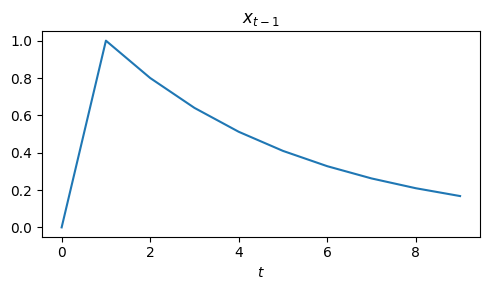

In [6]:
eq = ['x_{t}=\rho*x_{t-1}+\sigma*eps_{t}']  # define the law of motion of x_t
calibration = {'\rho':0.8,'\sigma':1}      # give numerical values to parameters.
system = Klein(eq, x='x_{t-1}', z='eps_{t}', calibration=calibration)
system.system_solution
mit_shock = system.simulate(x0 = 0, z = {'eps_{t}':np.array([1,0,0,0,0,0,0,0,0,0])})
mit_shock.plot('x_{t-1}')

### 2 equations NK model

$$\pi_t=\beta E[\pi_{t+1}]+\kappa y_{t}+u_t$$
$$y_t=E[y_{t+1}]+(1-\phi)E[\pi_{t+1}]+u_t$$

System with 1 stable eigenvalues and 1 pre-determined variables.


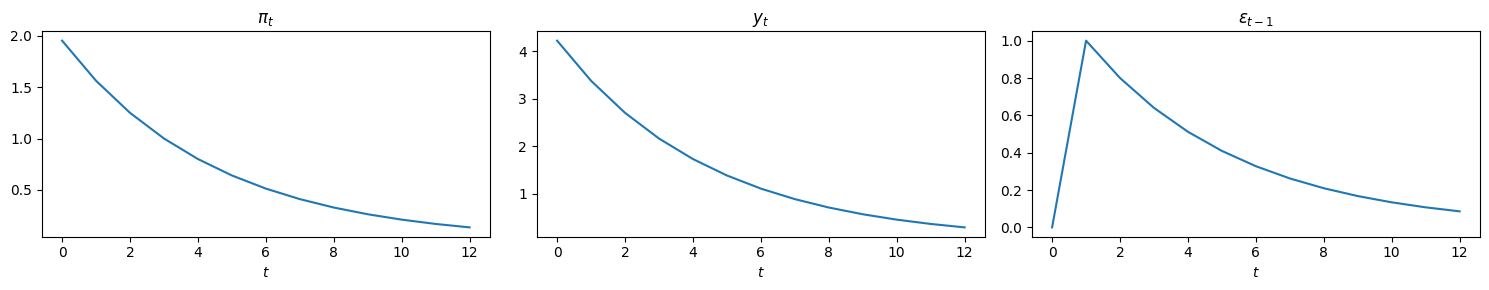

In [7]:
eq=[
    '\pi_{t}=\beta*E\pi_{t+1}+\kappa*y_{t}+u_{t}',
    'y_{t}=Ey_{t+1}+(1-\phi)*E[\pi_{t+1}]+\epsilon_{t}',
    '\epsilon_{t} = \rho_v*\epsilon_{t-1}+v_{t}'
]
calibration = {'\beta':0.98,'\kappa':0.1,'\phi':1.1,'\rho_v':0.8}
system = Klein(eq, x='\epsilon_{t-1}', p='\pi_{t},y_{t}', z='v_{t},u_{t}', calibration=calibration)
mit_shock = system.simulate(x0=0, z = {'v_{t}':np.array([1,0,0,0,0,0,0,0,0,0,0,0,0])})
mit_shock .plot('\pi_{t}, y_t, \epsilon_{t-1}')

### Test with static equations

`dsolve` also handles static equations. At this stage, it does not reduce the system.

System with 1 stable eigenvalues and 1 pre-determined variables.


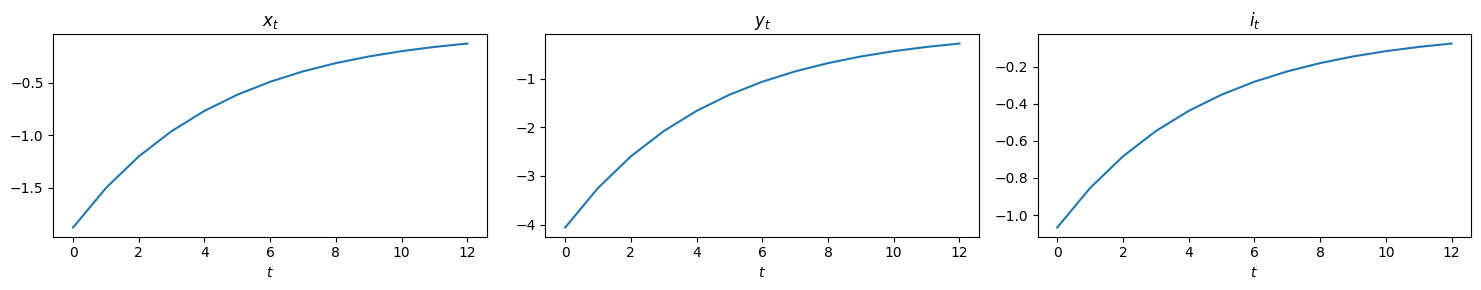

In [7]:
eq=[
    'x_{t}=b*Ex_{t+1}+kappa*y_{t}',
    'y_{t}=Ey_{t+1}-(i_t-x_{t}+rho)',
    'i_t=rho+phi*x_{t}+v_t',
    'v_t = rho_v*v_{t-1}+eps_t'
]
calibration = {'b':0.98,'kappa':0.1,'phi':1.1,'rho_v':0.8, 'rho':0.02}
system = Klein(eq, x='v_{t-1}', p='x_t,y_t,i_t', z='eps_t', calibration=calibration)
mit_shock = system.simulate(x0=0, z = {'eps_{t}':np.array([1,0,0,0,0,0,0,0,0,0,0,0,0])})
mit_shock .plot('x_{t}, y_t, i_{t}')

### VAR

\begin{align}
x_{t+1}&=ax_t+by_t+\epsilon_t\\
y_{t+1}&=cx_t+dy_t+\nu_t
\end{align}

System with 2 stable eigenvalues and 2 pre-determined variables.


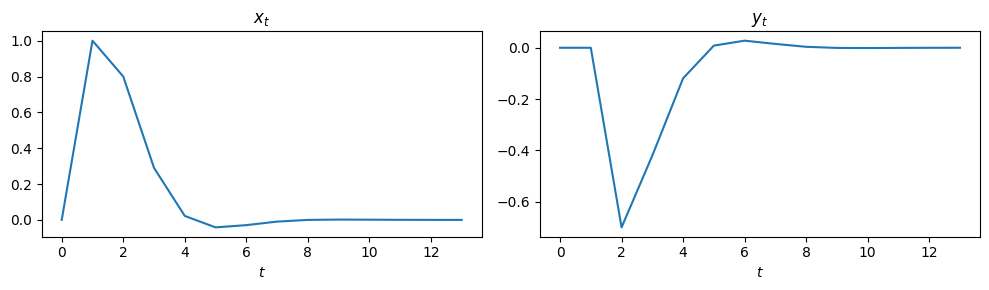

In [8]:
eq=[
    'x_{t+1}=a*x_{t}+b*y_{t}+eps_{t}',
    'y_{t+1}=c*x_{t}+d*y_{t}+nu_{t}'
]
calibration = {'a':0.8,'b':0.5,'c':-0.7,'d':-0.2}
system = Klein(eq, x='x_t,y_t', z='eps_t,nu_t', calibration=calibration)
x = system.simulate(x0=(0,0), z = {'eps_{t}':np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0])})
x.plot('x_t, y_t')

In [6]:
eq=[
    'x_{i,t}=\rho_{i}*x_{i,t-1}+\epsilon_{i,t}'
]
calibration = {'\rho_{0}': 0.9, '\rho_{1}': 0.3}
system = Klein(eq, x='x_{i,t-1}', z='\epsilon_{i,t}', calibration=calibration, indices={'i':(0,1)})
x = system.simulate(x0=(0,0), z = {'\epsilon_{0,t}':np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0])})
x.plot('x_{0,t-1}, x_{1,t-1}')

System with 2 stable eigenvalues and 2 pre-determined variables.


AttributeError: 'NoneType' object has no attribute 'group'